## MSDS 7331: Data Mining
## Lab 2:  Classification & Regression - Group 4

#### Paticia Attah
#### Linda Eliasen

##### Overview

The H-1B Dataset selected for this project contains data from employers Labor Condition Applications and the case certification determinations processed by the Office of Foreign Labor Certification (OFLC) where the date of the determination was issued on or after October 1, 2016 and on or before June 30, 2017.

The Labor Condition Application (LCA) is a document that a prospective H-1B employer files with the U.S. Department of Labor Employment and Training Administration (DOLETA) when it seeks to employ non-immigrant workers at a specific job occupation in an area of intended employment for no more than three years for the intital approval. Total stay is limited to 6 years.

An H-1B visa is issued for a specialty occupation, requiring theoretical and practical application of a body of specialized knowledge along with a bachelors degree or its equivalent. The prospective H-1B employee must also hold a U.S. bachelor's or higher degree, or the equivalent.

Both Classification and Regression Modeling will be conducted.

<b> Classification Goal</b>

NEEDS UPDATING The goal is to uncover insights that can help employers understand the process of getting their LCA approved. The results will help employers understand which applications that they may consider submitting will be certified. This information is important to an employer's buisness operations. It can pinpoint errors or informtion on the appication that may need adjusting to avoid processing delays and also drive the recruiting strategy in denial situations.<br>

Classification measures of success include accuracy, precision, recall and utltimatley the F Score, which we will compare among models.

<b>Regression Goal</b>

The goal is to predict the certification processing time, in days, of the LCA and identify the top features driving the prediction. 

Regression measures include Mean Average Error (MAE), Mean Averge Percent Error (MAPE) and Root Mean Square Error (RSME), which will be compared among all models to determine which model is best for the task at hand.

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics as mt
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from IPython.html import widgets 

from time import time

import pandas as pd
import statsmodels.api as sm 
import numpy as np
import random
from mlxtend.evaluate import paired_ttest_5x2cv

import math

import warnings
warnings.filterwarnings("ignore")

# Data Preparation Part 1

Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

xxxx

# Data Preparation Part 2

Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

# Modeling and Evaluation 1

Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.


### Task 1 - Classification

### Task 2 - Regression

MAE, MAPE and RMSE will be used to evaluate the processing days prediction error rates and model performance of the regression models.  MAE and RMSE are the two most popular metrics for continuous variables. These are appropriate measurements as the goal is an accurate prediction model.

While all three will be used for evalation, MAE will be the ultimate metric used to compare the models.  MAE is robust to outliers, as minimizing the absolute error results in finding the median; whereas RMSE is not as it minimizes the squared error, resulting in finding the mean. Also, MAE is a better choice for interpretation.

MAE (Mean Absolute Error) represents the difference between the original and predicted values extracted by averaging the absolute difference over the data set.

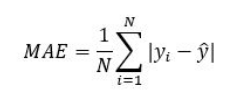

MAPE (Mean Absolute Percentage Error) measures the Mean Absolute error as a percentage, and can be calculated as the average absolute percent error for each time period minus actual values divided by actual values.

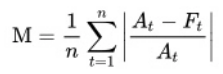

RMSE (Root Mean Squared Error) is the error rate by the square root of MSE. It represents the sample standard deviation of the differences between predicted values and observed values, otherwise known as residuals.

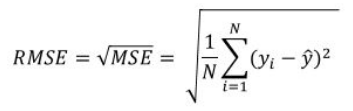

https://www.datatechnotes.com/2019/02/regression-model-accuracy-mae-mse-rmse.html#:~:text=MAE%20(Mean%20absolute%20error)%20represents,difference%20over%20the%20data%20set.

https://www.statisticshowto.com/mean-absolute-percentage-error-mape/#:~:text=It%20measures%20this%20accuracy%20as,values%20divided%20by%20actual%20values.


# Modeling and Evaluation 2

Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.
 

### Task 1 - Classification

### Task 2 - Regression

The method used for dividing the dataset for regression modeling is ten-fold cross validation with repeated holdout using ShuffleSplit. 80% of the data set is used for training and 20% reserved for testing. This is the most common method based on the Pareto Principle and appropriate for the size of our data set.  Having more samples for training lowers the variance and this split allows us to achieve low variance over the model parameters. Alternatively, 20% reserved for testing ensures enough data to observe low variance among the performance results.  Ideally, the goal is to achieve low variance for both.

Using CV eliminates the need for a validation set, which drastically reduces the number of samples which can be used for training the model and the results can depend on a particular random choce for the pair of train & validation sets.  While this approach can be computationally expensive, it does not waste too much of the data. To ensure the same splits for each cross validation, a random seed was set.

Grid Searching for each model will be employed to calculate the best parameters to use for each regression model. Grid searching is computationally expensive and builds a model on each parameter combination possible. It iterates through every parameter combination and stores a model for each combination. 

https://scikit-learn.org/stable/modules/cross_validation.html
http://www.beyondthelines.net/machine-learning/how-to-split-a-dataset/


# Modeling and Evaluation 3

Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

### Task 1 - Classification

### Task 2 - Regression

code for this section adapted from:

https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

The following regression models will be used to compare against the base linear regression model for the task of predicting the processing days for the LCA.  Each model will be compared using average MAE, MAPE and RSME results based on 10 Cross Validation folds of the optimized model parameters as indicated from the results of the grid search.  Ultimately, MAE and  a statistical comparison will be the deciding factor to determine the best model moving forward.

<b>LASSO</b>
Selected to develop a simple, sparse model to address any high level of multi collinearity that may be present in the data.  LASSO uses L1 regularization, adding a penalty equal to the magnitude of coefficients, which may take some coefficients to zero, thereby eliminating them from the model.

<b>Ridge Regression</b>
Selected to decrease model complexity by penalizing coefficients if they are too far from zero  (L2 penalty); forcing them to be small in a continuous way and keeping all variables in the model.

<b>Elasticnet</b>
Selected as it combines the penalties of ridge regression and LASSO to get the best of both models and we can compare the results of all three to see which is best for our data. 

<b>Multi-Layer Perceptron</b>
Selected as a curiousity to see how a neural network compares to more traditional regression models.


<b>Random Forest</b>
Selected as it works well on large datasets and often produce better results vs linear regresion as each tree is created from a different sample of rows and at each node a sample of features is selected for splitting. Each tree's predictions are then averaged to produce a single result. 



https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net

In [4]:
df8 = pd.read_csv ('Clean_Visa_Regression.csv')

In [7]:
df8.describe()

,DAYS_PROCESS,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,ANNUALIZED_PREVAILING_WAGE,ANNUALIZED_WAGE_RATE_OF_PAY,WILL_VIOL_Y,"Arts, Design, Entertainment, Sports, and Media",...,Office and Administrative Support,Personal Care and Service,Production,Protective Services,Sales and Related,Transportation and Material Moving,AGENT_REP_Y,H1B_DEP_Y,LABOR_CON_AGREE_Y,SUPPORT_H1B_Y
count,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000,...,33476.000000,33476.000000,33476.000000,33476.0,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000
mean,5.356225,2.112230,0.882154,0.345830,0.169644,0.008992,74416.168365,87158.937628,0.000807,0.015623,...,0.001374,0.000777,0.000807,0.0,0.005168,0.000090,0.552545,0.368025,0.406889,0.367278
std,1.409909,5.786439,4.136484,1.450022,1.464151,0.305796,22681.039825,29476.030196,0.028389,0.124014,...,0.037044,0.027858,0.028389,0.0,0.071703,0.009466,0.497239,0.482275,0.491261,0.482070
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12000.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,58552.000000,65000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,70616.000000,80002.090000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,87859.000000,104000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,155.000000,150.000000,55.000000,50.000000,50.000000,148370.000000,181000.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b> Setting up the data and helper functions</b>

In [8]:
# divide data set to x explanatory and y response variable
X = df8.drop(columns=['DAYS_PROCESS'])
y = df8['DAYS_PROCESS']

In [9]:
#CROSS VALIDATION 
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=24)

In [10]:
#CREATE METRICS
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#Function for Root mean squared error
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               }

In [11]:
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults

### BASELINE LINEAR REGRESSION MODEL

In [86]:
from sklearn.linear_model import LinearRegression
#Create a Linear Regression object and perform a grid search to find the best parameters
linreg = LinearRegression()
parameters = {'normalize':(True,False), 'fit_intercept':(True,False)}

from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.8s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=24, test_size=0.2, train_size=None),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': (True, False),
                         'normalize': (True, False)},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [87]:
#Print the parameterization of the best estimator
regGridSearch.best_estimator_

LinearRegression(normalize=True)

In [88]:
LRregEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(LRregEstimator, X, y, cv)

The average MAE for all cv folds is: 			 1.0768
The average MAE percentage (MAPE) for all cv folds is: 	 33.909
The average RMSE for all cv folds is: 			 1.3787
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,1.087315,34.861079,1.393722
1,1.088324,34.867341,1.402731
2,1.074347,33.362901,1.371090
3,1.067730,32.825063,1.359723
4,1.078060,33.630872,1.374514
5,1.068672,33.761874,1.369620
6,1.071291,33.860369,1.373094
7,1.074652,33.917896,1.377963
8,1.081981,34.219051,1.387476
9,1.075668,33.784028,1.377281


### LASSO

In [89]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Lasso

reg = Lasso(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=10000, precompute=True, tol=0.0001, random_state=0)

#Test parameters 
alpha = [0.001, 0.1, 1, 10, 20]
selection = ['cyclic','random']
warm_start = [True, False]
parameters = {'alpha': alpha, 'selection': selection, 'warm_start': warm_start}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   22.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   25.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   25.4s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=24, test_size=0.2, train_size=None),
             estimator=Lasso(max_iter=10000, normalize=True, precompute=True,
                             random_state=0),
             n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 10, 20],
                         'selection': ['cyclic', 'random'],
                         'warm_start': [True, False]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [90]:
#Display the best estimator parameters
regGridSearch.best_estimator_

Lasso(alpha=0.001, max_iter=10000, normalize=True, precompute=True,
      random_state=0, warm_start=True)

In [91]:
from sklearn.linear_model import Lasso

#Create a regression estimator with best parameters for cross validation
LSregEstimator = Lasso(alpha=0.001, max_iter=10000,
                     normalize=True, precompute=True, random_state=0,
                     warm_start=True)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(LSregEstimator, X, y, cv)

The average MAE for all cv folds is: 			 1.1152
The average MAE percentage (MAPE) for all cv folds is: 	 35.293
The average RMSE for all cv folds is: 			 1.4044
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,1.125248,36.342036,1.422071
1,1.126324,36.181979,1.427158
2,1.117223,34.824996,1.401159
3,1.104789,34.159696,1.383403
4,1.114567,34.961879,1.397471
5,1.108965,35.257976,1.399831
6,1.105454,35.160157,1.395323
7,1.113209,35.262073,1.401893
8,1.119154,35.555091,1.411026
9,1.117168,35.227278,1.404733


### RIDGE REGRESSION

In [92]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Ridge

reg = Ridge(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=1000, tol=0.0001, random_state=0)

#Test parameters 
alpha = [0.001, 0.1, 1, 5, 10, 20]
solver = [ 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
parameters = {'alpha': alpha, 'solver': solver}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   18.3s
[Parallel(n_jobs=8)]: Done 360 out of 360 | elapsed:   24.9s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=24, test_size=0.2, train_size=None),
             estimator=Ridge(max_iter=1000, normalize=True, random_state=0,
                             tol=0.0001),
             n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 5, 10, 20],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [93]:
#Display the best estimator parameters
regGridSearch.best_estimator_

Ridge(alpha=0.001, max_iter=1000, normalize=True, random_state=0,
      solver='sparse_cg', tol=0.0001)

In [94]:
#Create a regression estimator with best parameters for cross validation
RGregEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(RGregEstimator, X, y, cv)

The average MAE for all cv folds is: 			 1.0768
The average MAE percentage (MAPE) for all cv folds is: 	 33.911
The average RMSE for all cv folds is: 			 1.3787
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,1.087355,34.863011,1.393727
1,1.088359,34.868910,1.402719
2,1.074393,33.364824,1.371103
3,1.067766,32.826904,1.359716
4,1.078103,33.632327,1.374497
5,1.068711,33.763293,1.369612
6,1.071331,33.862106,1.373086
7,1.074697,33.919559,1.377958
8,1.082014,34.220590,1.387458
9,1.075708,33.785794,1.377279


### ELASTICNET

In [95]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import ElasticNet

reg = ElasticNet(fit_intercept=True, normalize=True, precompute=True, copy_X=True
          , max_iter=10000, tol=0.0001, random_state=0)
 
#Test parameters
l1_ratio = [0.001, 0.01, 0.1, 0.5, 0.75, 1]
alpha = [0.001, 0.1, 1, 10]
selection = ['cyclic','random']
warm_start = [True, False]
parameters = {'l1_ratio': l1_ratio, 'alpha': alpha, 'selection': selection, 'warm_start': warm_start}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 352 tasks      | elapsed:    5.2s
[Parallel(n_jobs=8)]: Done 852 tasks      | elapsed:   12.4s
[Parallel(n_jobs=8)]: Done 960 out of 960 | elapsed:   13.8s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=24, test_size=0.2, train_size=None),
             estimator=ElasticNet(max_iter=10000, normalize=True,
                                  precompute=True, random_state=0),
             n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 10],
                         'l1_ratio': [0.001, 0.01, 0.1, 0.5, 0.75, 1],
                         'selection': ['cyclic', 'random'],
                         'warm_start': [True, False]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [96]:
#Display the best estimator parameters
regGridSearch.best_estimator_

ElasticNet(alpha=0.001, l1_ratio=0.001, max_iter=10000, normalize=True,
           precompute=True, random_state=0, selection='random',
           warm_start=True)

In [97]:
#Create a regression estimator with best parameters for cross validation
EregEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(EregEstimator, X, y, cv)

The average MAE for all cv folds is: 			 1.1129
The average MAE percentage (MAPE) for all cv folds is: 	 35.219
The average RMSE for all cv folds is: 			 1.4018
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,1.123041,36.263725,1.419455
1,1.124020,36.111187,1.424643
2,1.114704,34.747244,1.398445
3,1.102464,34.086133,1.380795
4,1.112391,34.889583,1.394929
5,1.106614,35.174918,1.396902
6,1.103410,35.089142,1.392899
7,1.110933,35.189085,1.399393
8,1.116967,35.483218,1.408560
9,1.114737,35.151125,1.402058


### MULTI-LAYER PERCEPTRON

In [98]:
#Create a Linear Regression object and perform a grid search to find the best parameters
from sklearn.neural_network import MLPRegressor

linreg = MLPRegressor()
parameters = { 'activation':['logistic']
              ,'hidden_layer_sizes' : [200]
              ,'solver': ['sgd','adam']
              ,'alpha': [0.001]
              ,'batch_size':['auto'] 
              ,'random_state': [0]
              ,'learning_rate': ['constant', 'invscaling', 'adaptive']
              ,'learning_rate_init':[0.001]
              ,'power_t':[0.5]
              ,'max_iter':[1000]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:  3.5min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=24, test_size=0.2, train_size=None),
             estimator=MLPRegressor(), n_jobs=8,
             param_grid={'activation': ['logistic'], 'alpha': [0.001],
                         'batch_size': ['auto'], 'hidden_layer_sizes': [200],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.001], 'max_iter': [1000],
                         'power_t': [0.5], 'random_state': [0],
                         'solver': ['sgd', 'adam']},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [99]:
#Display the best estimator parameters
regGridSearch.best_estimator_

MLPRegressor(activation='logistic', alpha=0.001, hidden_layer_sizes=200,
             max_iter=1000, random_state=0)

In [100]:
#CreateLinearRegression predictions using the best parameters for our Linear Regression object
MPregEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(MPregEstimator, X, y, cv)

The average MAE for all cv folds is: 			 1.1088
The average MAE percentage (MAPE) for all cv folds is: 	 35.219
The average RMSE for all cv folds is: 			 1.4038
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,1.110566,36.263358,1.421637
1,1.155705,36.131786,1.427113
2,1.092491,34.708750,1.398674
3,1.087201,34.099303,1.383594
4,1.116664,34.902519,1.395831
5,1.107518,35.186443,1.398151
6,1.124482,35.120281,1.395255
7,1.113699,35.174193,1.400675
8,1.083253,35.477644,1.412645
9,1.096526,35.127034,1.404395


### RANDOM FOREST

##### DO NOT RUN - - Processing time is lengthy

In [27]:
#RANDOM FOREST 
#Create a Linear Regression object and perform a grid search to find the best parameters
from sklearn.ensemble import RandomForestRegressor

linreg = RandomForestRegressor()
parameters = {'max_depth' :[30]
              ,'n_estimators' : [75]
              ,'min_samples_leaf': [10, 25, 50]
              ,'criterion': ['mae']
              ,'n_jobs':[8] 
              ,'random_state': [0]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
RFregGridSearch = GridSearchCV(estimator=linreg
                   , n_jobs=8 
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
RFregGridSearch.fit(X, y)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed: 473.3min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=24, test_size=0.2, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=8,
             param_grid={'criterion': ['mae'], 'max_depth': [30],
                         'min_samples_leaf': [10, 25, 50], 'n_estimators': [75],
                         'n_jobs': [8], 'random_state': [0]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [28]:
#RANDOM FOREST
#Display the best estimator parameters
RFregGridSearch.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=30, min_samples_leaf=50,
                      n_estimators=75, n_jobs=8, random_state=0)

In [29]:
#RANDOM FOREST
#Create a regression estimator with best parameters for cross validation
RFregEstimator = RFregGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(RFregEstimator, X, y, cv)

The average MAE for all cv folds is: 			 0.87782
The average MAE percentage (MAPE) for all cv folds is: 	 33.946
The average RMSE for all cv folds is: 			 1.4833
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,0.896159,35.118681,1.504645
1,0.900270,35.198628,1.519029
2,0.881481,33.534550,1.479143
3,0.861226,32.592591,1.455525
4,0.869283,33.413760,1.467107
5,0.867890,33.781492,1.475739
6,0.871523,33.843891,1.474910
7,0.879344,34.035255,1.489888
8,0.876719,34.141393,1.484103
9,0.874256,33.796835,1.482922


## Modeling and Evaluation 4

Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

### Task 1 - Classification

### Task 2 - Regression

##### Metric Comparison across Models

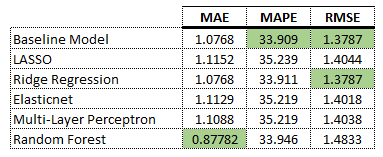

The base linear regression model resulted in an MAE of 1.0768 (33.909%) and an RSME of 1.3787.

Our first comparison is between LASSO, Ridge and Elasticnet.  Ridge performed much better than LASSO, indicating that the L2 penalty and keeping all coefficients in the model was the better choice.  Because Elasticnet combines the best of both models, it did not perform as well as Ridge because of the influece of the LASSO Model.  When comparing the Ridge model vs. the baseline regression model, it performed nearly identically, with the exception of MAPE which was slightly higher (33.911 vs. 33.909).

Mutli-Layer Perceptron performed slightly worse than the baseline, but produced better results than LASSO or Elasticnet from a MAE perspective.

Random Forest performed much better on MAE (0.87782), nearly the same for MAE Percentage and worse on RMSE vs the baseline model.

The visual provides overall performance for each of the models on all of the measurement metrics, in one summary chart (which alleviates the need to scroll through the code to find the results).  The user can then make an informed decision as to the better model based on the criteria of their choosing.  While we selected MAE for this analysis, in which case Random Forest performed the best; if the choosen metric was RSME this would lead to either using a Linear or Ridge regression model.

<AxesSubplot:title={'center':'MAE Across CV Folds by Model'}>

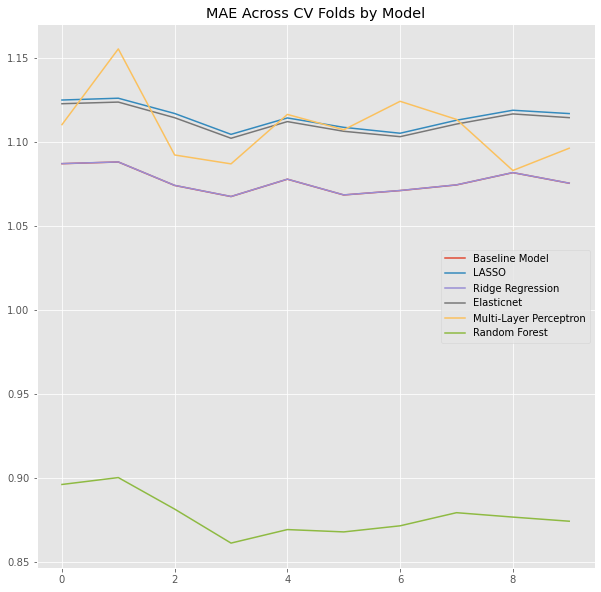

In [85]:
mae = pd.read_csv ('Model_MAE_Scores.csv')
mae.plot(kind = 'line', figsize=(10,10), title='MAE Across CV Folds by Model')

In the chart above, all six models are shown along with their respective MAE scores across each CV fold. This visual clearly shows that Random Forest performed significantly better across all ten folds vs. the other models, ranging between .87 and .90.  Ridge and the Baseline Regression Model had the next best performance (note that Ridge and the Baseline Model have overlapping lines).  LASSO and Elasticnet had identical patterns throughout the folds, with poorer perfomance vs. the other models.  Multi-Layer Perceptron's performance depended on the fold and lacked consistency in performance, which could be problematic during deployment.  

This provides insight into the MAE performance across each fold for the various models.  It is useful as it provides information "at-a-glance"  For example, the line for Multi-Layer Perceptron makes the variance between folds quite clear, which wasn't as easily evident when simply looking at the numerical results.  Having the results in one place also increases efficiency in the decision making process. 

## Modeling and Evaluation 5

Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

### Task 1 - Classification

### Task 2 - Regression

Advantages of Each Model

<b>Linear Regression</b>

1.	Simple method
2.	Good interpretation
3.	Easy to implement

<b>LASSO Regression</b>

1.	Select features, by shrinking co-efficient towards zero.
2.	Avoids over fitting

<b>Ridge Regression</b>

1.	Trades variance for bias 
2.	Prevents over fitting

<b>Elastic Net</b>

1.	Combines the best of the LASSO and Ridge models, which could result in a better model depending upon the complexities of the data.


<b>Multi-Layer Perceptron</b>

1.	Once trained, the predictions are pretty fast.
2.	Neural networks can be trained with any number of inputs and layers.
3.	Neural networks work best with more data points.

<b>Random Forest</b>

1.	One third of data is not used for training, which can be used for testing.
2.	High performance and accurate
3.	Provides feature importance estimate
4.	Can automatically handle missing values
5.	No feature scaling is required

https://medium.com/@gokul.elumalai05/pros-and-cons-of-common-machine-learning-algorithms-45e05423264f

#### Statistical Comparison of Regression Models

To identify which model is the better choice for our analysis, the decision will be based on MAE vs. RSME.

MAE is the average over the verification sample of the absolute values of the differences between forecast and the corresponding observation. The MAE is a linear score which means that all the individual differences are weighted equally in the average.  

The RMSE is a quadratic scoring rule which measures the average magnitude of the error and gives a relatively high weight to large errors. This means the RMSE is most useful when large errors are particularly undesirable. In the case of this analysis, the time span of DAYS_PROCESS in the data is 0-10 days, so we do not feel this is a concern.

With the baseline mode, the difference between MAE and RSME is 0.3019 and 0.6548 with Random Forest, indicating that Random Forest had greater variance in the individual errors in the sample.

http://www.eumetrain.org/data/4/451/english/msg/ver_cont_var/uos3/uos3_ko1.htm

Based on the MAE results shown in the table below, the better performing models appear to be the Baseline Linear Regression Model, Ridge Regression and Random Forest.  Of the three, we believe that Random Forest is the best performing model for our analysis. 

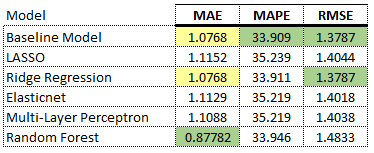

<b>To validate this hypothesis and determine if the difference is meaningful vs the other two models, we will compare the three models using the Paired T-Test with CV = 5.</b>

Based on the outcome of the statistical testing, we see that the Baseline Model and Ridge Regression Model did not have a meaningful difference, as expected based on the same MAE scores.  When comparing the Random Forest Model to the Baseline Model, we see that there is a stastistically meaningful difference. The Random Forest Model compared against the Ridge Regression Model also indicates a statistically meaningful difference.

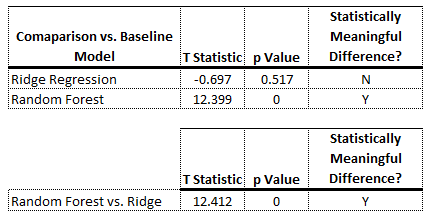

<b>This confirms that the best performing model for our analysis is Random Forest.</b> 


https://machinelearningmastery.com/hypothesis-test-for-comparing-machine-learning-algorithms/
http://rasbt.github.io/mlxtend/user_guide/evaluate/paired_ttest_5x2cv/

In [101]:
from mlxtend.evaluate import paired_ttest_5x2cv

Baseline Regression Model vs. Ridge

In [109]:
# compare algorithms
t, p = paired_ttest_5x2cv(estimator1=LRregEstimator, estimator2=RGregEstimator, X=X, y=y, random_seed=28)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

t statistic: -0.697
p value: 0.517
Algorithms probably have the same performance


Baseline Regression Model vs. Random Forest

In [113]:
# compare algorithms
t, p = paired_ttest_5x2cv(estimator1=LRregEstimator, estimator2=RFregEstimator, X=X, y=y, random_seed=28)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

t statistic: 12.399
p value: 0.000
Difference between mean performance is probably real


Random Forest vs. Ridge Regression

In [114]:
# compare algorithms
t, p = paired_ttest_5x2cv(estimator1=RGregEstimator, estimator2=RFregEstimator, X=X, y=y, random_seed=28)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

t statistic: 12.412
p value: 0.000
Difference between mean performance is probably real


## Modeling and Evaluation 6

Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

### Task 1 - Classification

### Task 2 - Regression

Top Performing Model - Random Forest 

DO NOT RUN - Processing time

Data will be scaled and grid search re-run and evaluated on the data.

In [115]:
#Scale dataset converting to standard normally distributed data 

from sklearn.preprocessing import StandardScaler

#Fit to data for scaling
scaler = StandardScaler()
scaler.fit(X)

#Transform training data to z-scores
#This makes our model's coefficients take on the same scale for accurate feature importance analisys 
X_Scl = scaler.transform(X)

In [116]:
#RANDOM FOREST SCALED DATA
#Create Regression object and perform a grid search to find the best parameters
from sklearn.ensemble import RandomForestRegressor

linreg = RandomForestRegressor()
parameters = {'max_depth' :[30]
              ,'n_estimators' : [75]
              ,'min_samples_leaf': [10, 25, 50]
              ,'criterion': ['mae']
              ,'n_jobs':[8] 
              ,'random_state': [0]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
RFSregGridSearch = GridSearchCV(estimator=linreg
                   , n_jobs=8 
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
RFSregGridSearch.fit(X_Scl, y)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed: 469.2min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=24, test_size=0.2, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=8,
             param_grid={'criterion': ['mae'], 'max_depth': [30],
                         'min_samples_leaf': [10, 25, 50], 'n_estimators': [75],
                         'n_jobs': [8], 'random_state': [0]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [117]:

#Display the best estimator parameters
RFSregGridSearch.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=30, min_samples_leaf=50,
                      n_estimators=75, n_jobs=8, random_state=0)

In [118]:
#DO NOT RUN

#Create a regression estimator with best parameters for cross validation
RFSregEstimator = RFSregGridSearch.best_estimator_

EvaluateRegressionEstimator(RFSregEstimator, X_Scl, y, cv)
#Fit the model 
#RFSregEstimator.fit(X_Scl, y)

The average MAE for all cv folds is: 			 0.87781
The average MAE percentage (MAPE) for all cv folds is: 	 33.946
The average RMSE for all cv folds is: 			 1.4833
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,0.896159,35.118681,1.504645
1,0.900268,35.198606,1.519029
2,0.881477,33.534493,1.479139
3,0.861226,32.592591,1.455525
4,0.869283,33.413760,1.467107
5,0.867892,33.781521,1.475740
6,0.871521,33.843874,1.474912
7,0.879344,34.035255,1.489888
8,0.876716,34.141343,1.484102
9,0.874252,33.796769,1.482922


<b>Note that the results of the cross validation are the same with the scaled and un-scaled data.  To ensure that the coefficient weights of the features are on the the same scale, we will use the scaled data.</b>

code from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

In [121]:
#Load the SCALED model's coefficient weights and feature names into a dataframe sorted by weights
weights = RFSregEstimator.feature_importances_.ravel()
feature_names = X.columns.values
RFS_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
RFS_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )
RFS_ft_imp_df

,feature_names,weights,absolute_weights
6,ANNUALIZED_WAGE_RATE_OF_PAY,3.890662e-01,3.890662e-01
5,ANNUALIZED_PREVAILING_WAGE,2.082992e-01,2.082992e-01
29,AGENT_REP_Y,1.075860e-01,1.075860e-01
0,TOTAL_WORKERS,9.837263e-02,9.837263e-02
20,Legal,3.874418e-02,3.874418e-02
1,NEW_EMPLOYMENT,3.646032e-02,3.646032e-02
11,Community and Social Service,2.766121e-02,2.766121e-02
31,LABOR_CON_AGREE_Y,2.095259e-02,2.095259e-02
30,H1B_DEP_Y,1.352924e-02,1.352924e-02
17,Healthcare Practitioners and Technical,1.152907e-02,1.152907e-02


### Top 15 Feature Importance

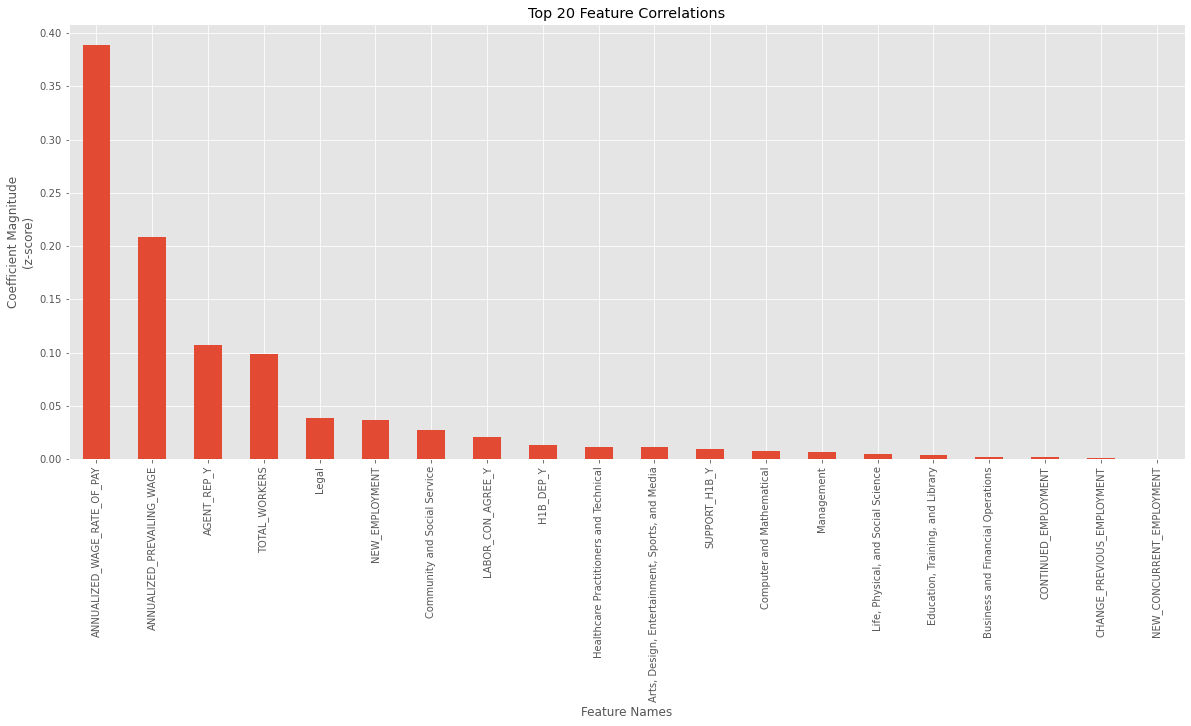

In [125]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = RFS_ft_imp_df.head(20)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top 20 Feature Correlations")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

The most influential features affecting processing time are annualized wage rate of pay and annualized prevailing wage.  This mamkes sense as one of the main criteria in certifying the application is that the wage rate of pay must be equal to or above the prevailing wage for the position based on industry and location.

Agent_Rep_Y:  This indicates that applications that were prepared with legal representation moved through the pipeline faster.  This is expected as applications that have legal involvement would be completed accurately.

Total_Workers: An application for 50 workers will undergo more review than an application for one worker.

New_Employment:  Applications for new employment vs. continued employment.  New employment applications indicate that the application is for employment with a new employer.  These likely require more processing time vs. continued employment.  

Labor_Con_Agree_Y indicates the Employer agrees to the responses to the Labor Condition Statements as in the subsection.  

From an occupational group perspective: Legal, Community and Social Service are more influential than other occupational groups. 

# Deployment

How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? 

Current Department of Labor (DOL) processing time for the Labor Condition Application (LCA), a requirement for all H-1B petitions, can take from 5 - 10 days.  Understanding which factors affect certification processing time and estimating the days to process the certification is useful for any business attempting to secure an H1-B Visa, as that process can take from 3 months to 1 year.  These insights can help in workforce planning, especially when reliant on non-US workers.

Value can be measured not only by accurately predicting processing time, but also pinpointing areas that may lengthen the time so that employers can address those prior to submission.

Deployment?

Other data collection ?

How often would the model be updated?

# Exceptional Work